In [1]:
import pandas as pd
import numpy as np
import time
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as rng

caminho_do_projeto = r'C:\Users\kmenezes\OneDrive - unb.br\tcc_organizacao'

if caminho_do_projeto not in sys.path:
    sys.path.insert(0, caminho_do_projeto)

from projeto_aplicado.modelos.otimizador_pli import OtimizadorPLI
from projeto_aplicado.modelos.otimizador_aco import OtimizadorACO
from projeto_aplicado.modelos.otimizador_ag import OtimizadorAG
from projeto_aplicado.modelos.otimizador_base import Otimizador
from projeto_aplicado.modelos.analisador import AnalisadorDeSolucao

base = r"C:\\Users\\kmenezes\\OneDrive - unb.br\\tcc_organizacao\\dados"

# Configurações de visualização
sns.set_theme(style="whitegrid")
pd.set_option('display.max_rows', 100)

In [2]:
CONFIG_BASE = {
    "ARQUIVOS_DADOS": {
        "disciplinas": "disciplinas.csv",
        "professores": "docentes.csv",
        "preferencias": "preferencias.csv",
        "conflitos": "matriz_conflitos.csv" 
    },
    "ALOCACOES_FIXAS": [
    ]
}

# Parâmetros específicos para cada algoritmo
CONFIG_PLI = {
    **CONFIG_BASE,
    "PENALIDADE_W": 4.0
}

CONFIG_ACO = {
    **CONFIG_BASE,
    "ACO_PARAMS": {
        "n_formigas": 20,
        "n_geracoes": 30,
        "alfa": 3.0,
        "beta": 4.0,
        "taxa_evaporacao": 0.3,
    }
}

CONFIG_AG = {
    **CONFIG_BASE,
    "AG_PARAMS": {
        "n_populacao": 200,
        "n_geracoes": 100,
        "taxa_crossover": 0.8,
        "taxa_mutacao": 0.1,
        "tamanho_torneio": 9,
        "fator_penalidade": 3,
        "tamanho_elite": 20
    }
}
analise = AnalisadorDeSolucao(config=CONFIG_BASE)
otimizador = Otimizador(config=CONFIG_BASE)
d1 = otimizador.dados_brutos
prof = d1['professores']
disc = d1['disciplinas']
conf = d1['conflitos']
pref = d1['preferencias']

df = pd.DataFrame()

In [6]:
s252 = pd.read_csv('../dados/solucao_25_1.csv')
rdep = s252.merge(disc[['id_disciplina', 'disciplina']], on='id_disciplina', how='left').merge(prof[['id_docente', 'docente']], on='id_docente',how='left')
rdep2 = rdep[['id_disciplina', 'docente', 'preferencia']]
rdep2.columns = ['id_disciplina',  'dep_docente', 'dep_preferencia']
result = analise.avaliar(rdep)
df1 = pd.DataFrame({'metodo':['Departamento'],'escore_total': result['escore_total'], **result['distribuicao_preferencias']})
df = pd.concat([df, df1], ignore_index=True)

In [3]:
otimizador_pli = OtimizadorPLI(config=CONFIG_PLI)
inicio = time.perf_counter()
rpli = otimizador_pli.resolver()['alocacao_final']
duracao_pli = time.perf_counter() - inicio
rpli = rpli.merge(prof[['id_docente', 'docente']], on ='id_docente',how='left')
rpli2 = rpli[['id_disciplina', 'docente', 'preferencia']]
rpli2.columns = ['id_disciplina',  'pli_docente', 'pli_preferencia']
print(analise.avaliar(rpli))

result = analise.avaliar(rpli)
df1 = pd.DataFrame({'metodo':['PLI'],
                    'escore_total': result['escore_total'],
                    'tempo_execucao': duracao_pli,
                    **result['distribuicao_preferencias']})
df = pd.concat([df, df1], ignore_index=True)

{'escore_total': 132, 'distribuicao_preferencias': {'pref_3': np.int64(42), 'pref_2': np.int64(2), 'pref_1': np.int64(2), 'pref_0': np.int64(1)}, 'violacoes_capacidade_total_excesso': 0, 'professores_com_violacao': 0, 'conflitos_totais': 0}


In [5]:
rpli = otimizador_pli.resolver()

In [8]:
result.get('escore_total')

132

In [8]:
rpli['id_disciplina'].nunique(), rpli['id_docente'].nunique()

(47, 24)

In [9]:
otimizador_aco = OtimizadorACO(config=CONFIG_ACO)
inicio = time.perf_counter()
raco = otimizador_aco.resolver()['alocacao_final']
duracao_aco = time.perf_counter() - inicio

raco = raco.merge(prof[['id_docente', 'docente']], on ='id_docente',how='left')
raco2 = raco[['id_disciplina', 'docente', 'preferencia']]
raco2.columns = ['id_disciplina',  'aco_docente', 'aco_preferencia']
result = analise.avaliar(raco)
df1 = pd.DataFrame({'metodo':['ACO'],
                    'escore_total': result['escore_total'],
                    'tempo_execucao': duracao_aco,
                    **result['distribuicao_preferencias']})
df = pd.concat([df, df1], ignore_index=True)

In [4]:
raco = otimizador_aco.resolver()

In [7]:
raco['metricas_iteracao']

[{'geracao': 1,
  'melhor_geracao': np.float64(122.0),
  'melhor_global': np.float64(122.0),
  'media_geracao': 114.27777777777777},
 {'geracao': 2,
  'melhor_geracao': np.float64(126.0),
  'melhor_global': np.float64(126.0),
  'media_geracao': 118.06666666666666},
 {'geracao': 3,
  'melhor_geracao': np.float64(124.0),
  'melhor_global': np.float64(126.0),
  'media_geracao': 121.11111111111111},
 {'geracao': 4,
  'melhor_geracao': np.float64(127.0),
  'melhor_global': np.float64(127.0),
  'media_geracao': 122.3529411764706},
 {'geracao': 5,
  'melhor_geracao': np.float64(128.0),
  'melhor_global': np.float64(128.0),
  'media_geracao': 122.33333333333333},
 {'geracao': 6,
  'melhor_geracao': np.float64(130.0),
  'melhor_global': np.float64(130.0),
  'media_geracao': 124.17647058823529},
 {'geracao': 7,
  'melhor_geracao': np.float64(128.0),
  'melhor_global': np.float64(130.0),
  'media_geracao': 125.78947368421052},
 {'geracao': 8,
  'melhor_geracao': np.float64(129.0),
  'melhor_globa

In [3]:
otimizador_ag = OtimizadorAG(config=CONFIG_AG)
inicio = time.perf_counter()
rag = otimizador_ag.resolver()['alocacao_final']
duracao_ag = time.perf_counter() - inicio
rag = rag.merge(prof[['id_docente', 'docente']], on ='id_docente',how='left')
rag2 = rag[['id_disciplina', 'docente', 'preferencia']]
rag2.columns = ['id_disciplina',  'ag_docente', 'ag_preferencia']
result = analise.avaliar(rag)
df1 = pd.DataFrame({'metodo':['AG'],
                    'escore_total': result['escore_total'],
                    'tempo_execucao': duracao_ag,
                    **result['distribuicao_preferencias']})
df = pd.concat([df, df1], ignore_index=True)

In [11]:
disc = disc[['id_disciplina', 'disciplina']].merge(rdep2, on = 'id_disciplina', how='left')\
                                    .merge(rpli2, on = 'id_disciplina', how='left')\
                                    .merge(raco2, on = 'id_disciplina', how='left')\
                                    .merge(rag2, on = 'id_disciplina', how='left')

#disc.to_excel('comparacao_resultados.xlsx',index=False)

In [6]:
df

,metodo,escore_total,tempo_execucao,pref_3,pref_2,pref_1,pref_0
0,PLI,132,5.297436,42,2,2,1
1,ACO,130,16.574191,41,3,1,2
2,AG,129,4.963717,40,3,3,1


In [20]:
analise.avaliar(rag)

{'escore_total': np.int64(131),
 'distribuicao_preferencias': {'pref_3': np.int64(41),
  'pref_2': np.int64(3),
  'pref_1': np.int64(2),
  'pref_0': np.int64(1)},
 'violacoes_capacidade_total_excesso': 1,
 'professores_com_violacao': 1,
 'conflitos_totais': 0}

In [10]:
rag = otimizador_ag.resolver()
raco = otimizador_aco.resolver()

In [5]:
def _geracao_convergencia_primeira(metricas_iteracao):
    """
    Retorna a primeira geração em que o melhor valor final da função objetivo
    foi alcançado. Não retorna o valor do objetivo, apenas o número da geração.
    """
    try:
        met_df = pd.DataFrame(metricas_iteracao)
        max = met_df['melhor_global'].max()
        pri_ger = int(met_df[met_df['melhor_geracao'] == max]['geracao'].min())
        return pri_ger
    except Exception:
        return None


In [6]:
m1 = pd.DataFrame(rag['metricas_iteracao'])

In [13]:
_geracao_convergencia_primeira(raco['metricas_iteracao'])

15

In [16]:
disc['id_disciplina'].nunique()

47

In [17]:
res = gerar_cenario_perturbado(base, proporcao_reshuffle=0.04, proporcao_resample=0.03, seed=123, resolver_pli=True)
print(res['pli_metrics'])
print(res['metrics'])


TypeError: gerar_cenario_perturbado() got an unexpected keyword argument 'resolver_pli'

In [18]:
df1 = pd.read_csv('resultados_batches_v4/resultados_batch_1_paralelizado.csv')
df2 = df = pd.read_csv('resultados_batches_v4/resultados_batch_2_paralelizado.csv')

df = pd.concat([df1, df2], ignore_index=True)

In [19]:
df

,simulacao,tempo_perturbacao,metricas_preferencia,metricas_horario,folga_total,tempo_pli,tempo_aco,tempo_ag,geracoes_aco,geracoes_ag,geracao_convergencia_aco,geracao_convergencia_ag,resultado_pli,resultado_aco,resultado_ag
0,1.0,0.031250,"{'proporcao_perturbacao': 0.24619108272969176,...","{'n_mudancas_horarios': 10, 'n_conflitos': np....",5,7.078125,185.265625,15.046875,34,300,1,115,"[{'escore_total': 139, 'distribuicao_preferenc...","[{'escore_total': 139, 'distribuicao_preferenc...","[{'escore_total': 139, 'distribuicao_preferenc..."
1,2.0,0.062500,{'proporcao_perturbacao': 0.062491793733507654...,"{'n_mudancas_horarios': 9, 'n_conflitos': np.f...",0,6.421875,179.156250,36.703125,145,300,4,255,"[{'escore_total': 134, 'distribuicao_preferenc...","[{'escore_total': 133, 'distribuicao_preferenc...","[{'escore_total': 132, 'distribuicao_preferenc..."
2,3.0,0.031250,"{'proporcao_perturbacao': 0.2609765626087287, ...","{'n_mudancas_horarios': 10, 'n_conflitos': np....",2,6.390625,180.234375,12.921875,40,300,11,74,"[{'escore_total': 141, 'distribuicao_preferenc...","[{'escore_total': 141, 'distribuicao_preferenc...","[{'escore_total': 141, 'distribuicao_preferenc..."
3,4.0,0.046875,"{'proporcao_perturbacao': 0.10455055364286457,...","{'n_mudancas_horarios': 9, 'n_conflitos': np.f...",2,5.828125,184.125000,39.343750,36,300,1,232,"[{'escore_total': 136, 'distribuicao_preferenc...","[{'escore_total': 136, 'distribuicao_preferenc...","[{'escore_total': 131, 'distribuicao_preferenc..."
4,5.0,0.046875,"{'proporcao_perturbacao': 0.13971047381965374,...","{'n_mudancas_horarios': 10, 'n_conflitos': np....",3,6.578125,183.187500,5.890625,50,300,4,82,"[{'escore_total': 140, 'distribuicao_preferenc...","[{'escore_total': 140, 'distribuicao_preferenc...","[{'escore_total': 138, 'distribuicao_preferenc..."
5,6.0,0.078125,"{'proporcao_perturbacao': 0.07193946938612351,...","{'n_mudancas_horarios': 9, 'n_conflitos': np.f...",2,8.343750,175.921875,38.375000,110,300,2,97,"[{'escore_total': 136, 'distribuicao_preferenc...","[{'escore_total': 135, 'distribuicao_preferenc...","[{'escore_total': 134, 'distribuicao_preferenc..."
6,7.0,0.109375,"{'proporcao_perturbacao': 0.25214731334203205,...","{'n_mudancas_horarios': 10, 'n_conflitos': np....",4,8.296875,174.609375,31.796875,80,300,2,49,"[{'escore_total': 140, 'distribuicao_preferenc...","[{'escore_total': 140, 'distribuicao_preferenc...","[{'escore_total': 140, 'distribuicao_preferenc..."
7,8.0,0.109375,"{'proporcao_perturbacao': 0.10820842449578379,...","{'n_mudancas_horarios': 9, 'n_conflitos': np.f...",3,8.718750,176.281250,38.234375,47,300,8,132,"[{'escore_total': 139, 'distribuicao_preferenc...","[{'escore_total': 139, 'distribuicao_preferenc...","[{'escore_total': 139, 'distribuicao_preferenc..."
8,9.0,0.109375,"{'proporcao_perturbacao': 0.100099769924099, '...","{'n_mudancas_horarios': 9, 'n_conflitos': np.f...",4,8.906250,176.203125,10.109375,28,300,4,55,"[{'escore_total': 139, 'distribuicao_preferenc...","[{'escore_total': 139, 'distribuicao_preferenc...","[{'escore_total': 138, 'distribuicao_preferenc..."
9,10.0,0.125000,"{'proporcao_perturbacao': 0.21984278537165663,...","{'n_mudancas_horarios': 10, 'n_conflitos': np....",1,8.343750,176.531250,15.718750,32,300,5,207,"[{'escore_total': 139, 'distribuicao_preferenc...","[{'escore_total': 137, 'distribuicao_preferenc...","[{'escore_total': 139, 'distribuicao_preferenc..."


In [4]:
# ...existing code...
from projeto_aplicado.modelos.otimizador_aco_instrumentado import OtimizadorACOInstrumentado

CONFIG_ACO = {
    **CONFIG_BASE,
    "ACO_PARAMS": {
        "n_formigas": 12,
        "n_geracoes": 30,
        "alfa": 1.0,
        "beta": 2.0,
        "taxa_evaporacao": 0.1,
        "capturar_feromonio": True,
        "freq_snapshot": 1,                 # coleta a cada geração (ajuste para 5, 10, ...)
        "salvar_dir": r"C:\Users\kmenezes\OneDrive - unb.br\tcc_organizacao\aco_visuals",
        "salvar_prefixo": "aco_feromonio",
        "salvar_final_npy": True,
        "salvar_stats_csv": True,
        "salvar_amostra_csv": True,
        "amostra_max": 1500
    }
}
aco = OtimizadorACOInstrumentado(CONFIG_ACO)
resultado = aco.resolver()  # usa pipeline do Otimizador base
# Agora você tem resultado["feromonio_stats"] e o arquivo ..._final.npy para heatmap
# ...existing code...

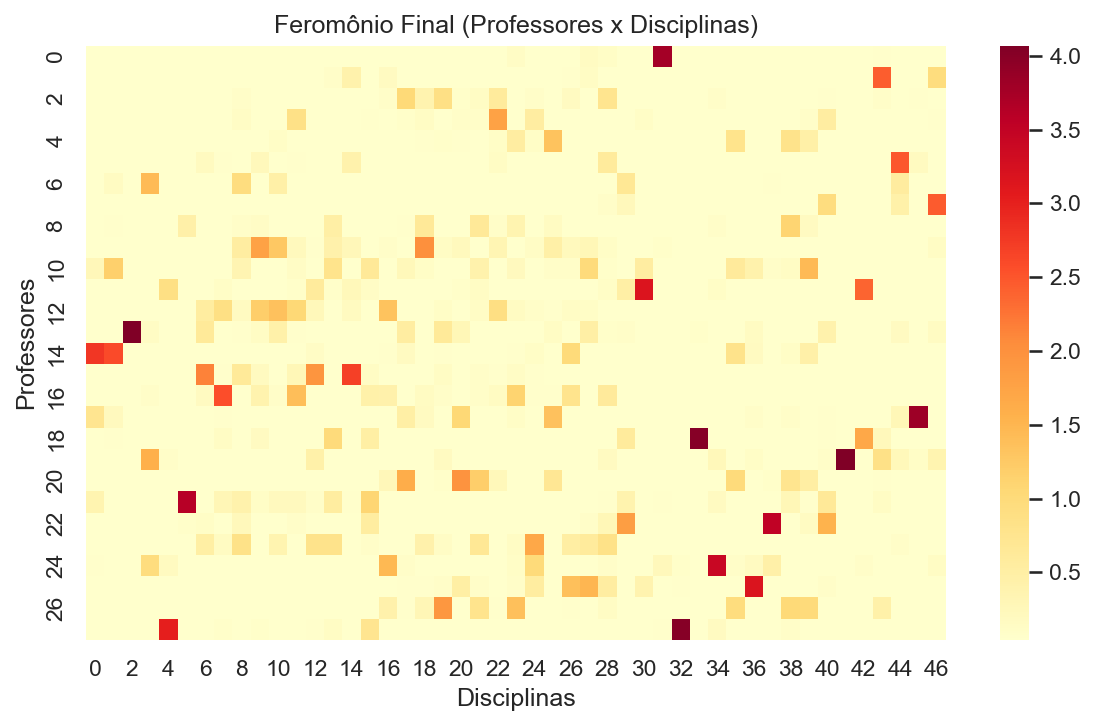

In [5]:


path_npy = r"C:\Users\kmenezes\OneDrive - unb.br\tcc_organizacao\aco_visuals\aco_feromonio_final.npy"
arr = np.load(path_npy)

plt.figure(figsize=(8,5), dpi=150)
sns.heatmap(arr, cmap="YlOrRd")
plt.title("Feromônio Final (Professores x Disciplinas)")
plt.xlabel("Disciplinas")
plt.ylabel("Professores")
plt.tight_layout()
plt.show()

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as imageio
import os

# ==========================================
# CONFIGURAÇÕES DE TEMPO (MEXA AQUI)
# ==========================================
DURACAO_FRAME = 1.0  # Tempo em segundos para CADA geração (1.0 = 1 segundo)
DURACAO_FINAL = 5.0  # Tempo em segundos que a imagem FINAL fica congelada
# ==========================================

# Criar pasta para frames temporários
os.makedirs('frames_ajustaveis', exist_ok=True)

# Configurações do Problema
n_disciplinas = 47
n_professores = 28
n_formigas = 10
n_iteracoes = 30 

# --- Geração de Dados Simulados ---
historico_formigas = np.zeros((n_iteracoes, n_formigas, n_disciplinas))
solucao_otima = np.random.randint(0, n_professores, n_disciplinas)

print("Gerando dados da simulação...")
for it in range(n_iteracoes):
    fator_convergencia = (it / n_iteracoes) ** 2 
    for f in range(n_formigas):
        for d in range(n_disciplinas):
            # Lógica de convergência simulada
            if np.random.rand() < (fator_convergencia * 0.95): 
                historico_formigas[it, f, d] = solucao_otima[d]
            else:
                historico_formigas[it, f, d] = np.random.randint(0, n_professores)

print("Gerando as imagens (Frames)...")
filenames = []
cores = plt.cm.get_cmap('tab10', n_formigas)

for it in range(n_iteracoes):
    fig, ax = plt.subplots(figsize=(10, 12)) # Tamanho vertical
    
    # Grid de fundo
    ax.grid(True, color='#E0E0E0', linestyle='-', linewidth=0.5, zorder=0)
    
    # Plot das formigas
    for f in range(n_formigas):
        escolhas = historico_formigas[it, f, :]
        y_pos = np.arange(n_disciplinas)
        
        # Jitter (tremulação) para visualização
        jitter_x = np.random.uniform(-0.35, 0.35, size=n_disciplinas)
        jitter_y = np.random.uniform(-0.15, 0.15, size=n_disciplinas)
        
        ax.scatter(
            x = escolhas + jitter_x, 
            y = y_pos + jitter_y,
            color=cores(f),
            s=50, alpha=0.7, edgecolors='white', linewidth=0.5, zorder=3
        )

    # Textos e Eixos
    ax.set_title(f'Iteração {it+1} de {n_iteracoes}', fontsize=18, pad=15)
    ax.set_ylabel('Disciplinas', fontsize=14)
    ax.set_xlabel('Professores', fontsize=14)
    ax.set_xlim(-1, n_professores)
    ax.set_ylim(-1, n_disciplinas)
    ax.invert_yaxis() 
    
    # Salvar frame
    filename = f'frames_ajustaveis/frame_{it:03d}.png'
    plt.savefig(filename, dpi=80, bbox_inches='tight')
    plt.close()
    filenames.append(filename)

print(f"Compilando GIF com {DURACAO_FRAME}s por frame...")

# --- CRIAÇÃO DO GIF ---
with imageio.get_writer('convergencia_30seg.gif', mode='I', duration=DURACAO_FRAME, loop=0) as writer:
    
    # 1. Adiciona todos os frames da evolução
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
        
    # 2. Adiciona frames extras do FINAL para congelar a imagem
    # Calculamos quantas cópias do último frame precisamos para durar DURACAO_FINAL
    qtd_frames_finais = int(DURACAO_FINAL / DURACAO_FRAME)
    ultimo_frame = imageio.imread(filenames[-1])
    
    for _ in range(qtd_frames_finais):
        writer.append_data(ultimo_frame)

print("Concluído! O arquivo 'convergencia_30seg.gif' foi salvo.")

Gerando dados da simulação...
Gerando as imagens (Frames)...


C:\Users\kmenezes\AppData\Local\Temp\ipykernel_20676\4098670347.py:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cores = plt.cm.get_cmap('tab10', n_formigas)


Compilando GIF com 1.0s por frame...
Concluído! O arquivo 'convergencia_30seg.gif' foi salvo.
